# <center> Motor Insurance Sale Prediction </center>


---


#### <center> By Boluwatife Yebisi </center>

### Introduction

In this case study, I have extensively explored the motor insurance dataset provided, performed data preprocessing, and conducted insightful data analysis. I have employed various techniques, algorithms, and visualizations to gain a comprehensive understanding of the data and extract meaningful insights. Through careful feature engineering, including the creation of age groups and combined driver experience, I have effectively captured relevant patterns and behaviors that may influence insurance sales.

For the predictive modeling task, I have utilized the Gradient Boosting Classifier, Support Vector Classifier, Random Forest Classifier, Logistic Regression, and Decision Tree Classifier algorithms. Each algorithm was evaluated based on precision, recall, F1-score, and accuracy metrics. The results, along with visualizations, are presented in this Jupyter notebook.

### Data Preprocessing

In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#locate folder path
%cd /content/drive/MyDrive/insurance_data/data

/content/drive/MyDrive/insurance_data/data


In [ ]:
#import libraries
import pandas as pd
import numpy as np

#import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

#import library for categorical data encoding
from sklearn.preprocessing import LabelEncoder

#import library for train test split
from sklearn.model_selection import train_test_split

#import library for feature scaling
from sklearn.preprocessing import StandardScaler

#import libraries for selected algorithms
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#import libraries for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#import library for hyper parameter tuning
from sklearn.model_selection import GridSearchCV


#### Load the Dataset

In [ ]:
#read and load csv
df = pd.read_csv('Assessment_Dataset.csv')

#### Basic Info About the Dataset

In [ ]:
#last 5 rows
df.tail()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale
49995,21.0,15000.0,58.007449,580.074489,6000.0,434.977664,1.894374,30/12/2016,S,1
49996,26.0,15000.0,55.975032,559.750319,4000.0,408.848284,6.832814,30/12/2016,M,1
49997,37.0,15000.0,50.526322,505.263219,6000.0,397.137006,4.616951,30/12/2016,M,1
49998,34.0,15000.0,58.494642,584.946419,4000.0,449.336846,8.688381,30/12/2016,S,1
49999,32.0,9000.0,78.179665,781.796645,10000.0,430.010762,12.475750,30/12/2016,S,1


In [ ]:
#view the basic info of each feature of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Driver_Age            49506 non-null  float64
 1   Vehicle_Value         49491 non-null  float64
 2   Tax                   49519 non-null  float64
 3   Price                 49504 non-null  float64
 4   Vehicle_Mileage       49464 non-null  float64
 5   Credit_Score          49478 non-null  float64
 6   Licence_Length_Years  49508 non-null  float64
 7   Date                  50000 non-null  object 
 8   Marital_Status        49512 non-null  object 
 9   Sale                  50000 non-null  int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 3.8+ MB


In [ ]:
#Obtain the number of rows and columns in the dataset
print("There are %s rows and %s columns in the dataset" % (df.shape[0], df.shape[1]))

There are 50000 rows and 10 columns in the dataset


In [ ]:
#Get the features of the dataset
df.columns

Index(['Driver_Age', 'Vehicle_Value', 'Tax', 'Price', 'Vehicle_Mileage',
       'Credit_Score', 'Licence_Length_Years', 'Date', 'Marital_Status',
       'Sale'],
      dtype='object')

In [ ]:
#view data types of each feature
print(df.dtypes)

Driver_Age              float64
Vehicle_Value           float64
Tax                     float64
Price                   float64
Vehicle_Mileage         float64
Credit_Score            float64
Licence_Length_Years    float64
Date                     object
Marital_Status           object
Sale                      int64
dtype: object


In [ ]:
#convert date to date format
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-10-64c77de478bd>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
#convert sale to categorical
df['Sale'] = df['Sale'].astype('object')

In [ ]:
#description of numerical data
df.describe()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years
count,49506.000000,49491.000000,49519.000000,49504.000000,49464.000000,49478.000000,49508.000000
mean,29.800469,8455.699016,48.501812,552.212188,6997.007925,496.299344,5.826738
std,7.517675,1978.902770,17.736129,136.645548,1358.295284,963.420343,3.291092
min,18.000000,2000.000000,2.424954,38.520108,1000.000000,55.887237,-0.346291
25%,24.000000,7000.000000,33.047127,456.627040,6000.000000,346.238968,2.896016
50%,29.000000,8000.000000,50.075894,560.945713,7000.000000,400.260551,6.460895
75%,35.000000,10000.000000,62.701611,650.643347,8000.000000,455.128115,8.366937
max,74.000000,15000.000000,102.645206,1026.452055,13000.000000,9999.000000,16.370415


In [ ]:
#description of categorical data
round(df.describe(include = 'object'))

,Marital_Status,Sale
count,49512,50000
unique,3,2
top,M,1
freq,24596,34899


#### Exploratory Data Analysis

EDA is carried out to understand the initial state of the dataset

In [ ]:
#collect all the numerical columns into a list
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols


['Driver_Age',
 'Vehicle_Value',
 'Tax',
 'Price',
 'Vehicle_Mileage',
 'Credit_Score',
 'Licence_Length_Years']

##### Distribution of Numeric Columns

<ipython-input-15-97d1fd52525b>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7, 4, i+1)


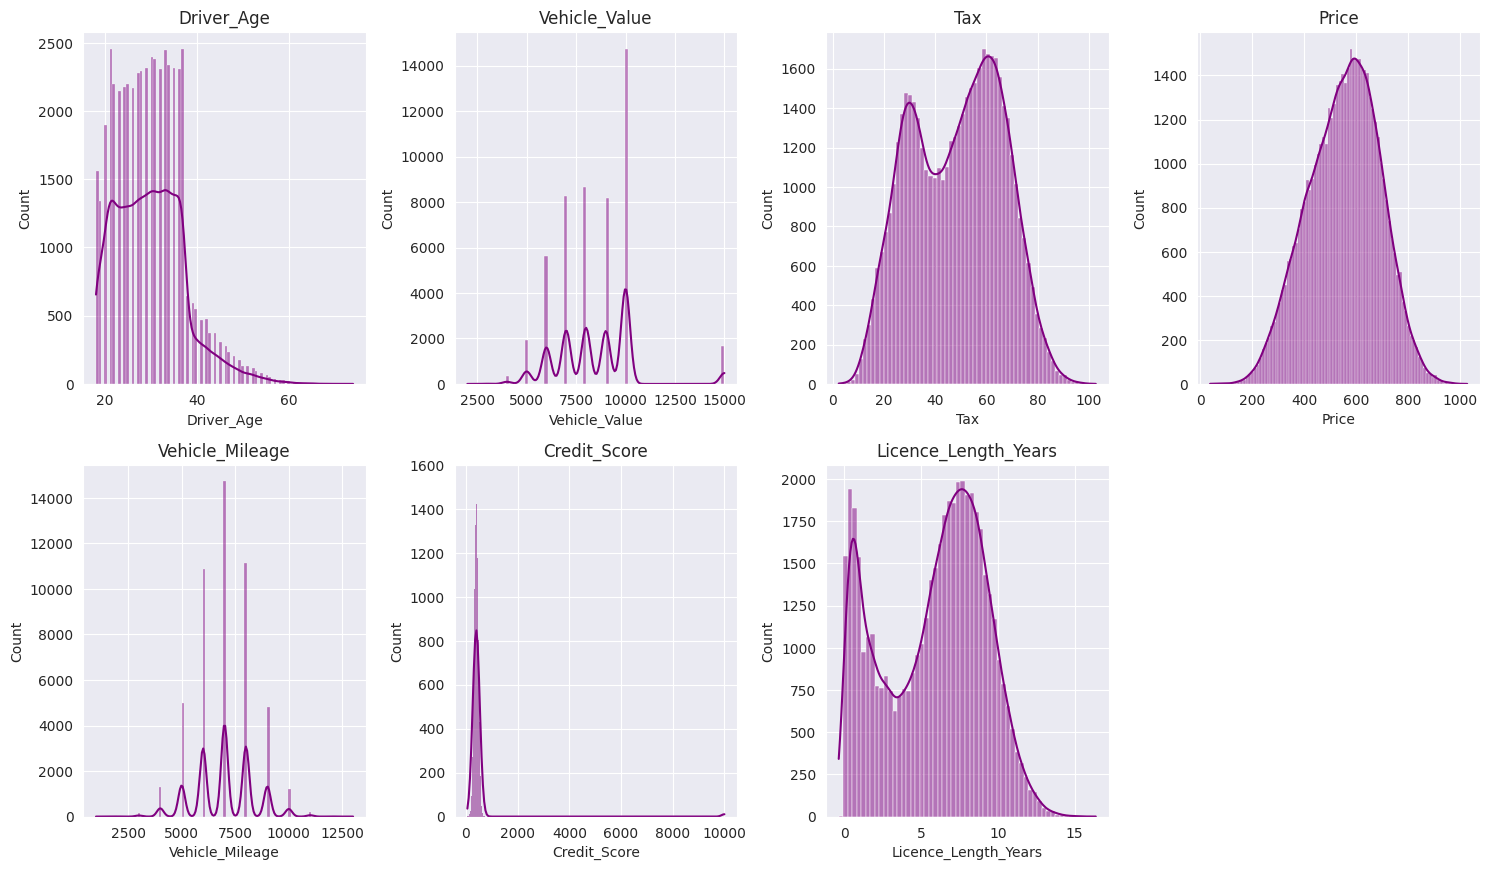

In [ ]:
# plt.style.use('ggplot')
#plots for all numerical variables
fig, axes = plt.subplots(figsize=(15,30))
#7 columns present
for i in range(len(numeric_cols)):
    sns.set_style("darkgrid")
#     to suggest how the charts be displayed
    plt.subplot(7, 4, i+1)
#     to plot the histogram
    sns.histplot(df[numeric_cols[i]], kde=True, color='purple')
#     to make the layout well organized
    plt.tight_layout()
#     to title each plot.
    plt.title(numeric_cols[i])
plt.show()

Observations

The charts above show the distribution of each numeric feature.

*   Driver age histogram show that the majority of the drivers fall within the age range of 20-40, with a peak around 35 years.
*   Credit score looks extremely right skewed (it is very right skewed indicating outliers on the upper side
*   Price is normally distributed
*   Tax and License length years is almost normally distributed.
*   Driver age is also right skewed indicating outliers on the upper side. This might be allowed depending on what the max age for the driver is
*   The histogram plot of the 'Vehicle_Value' and 'Vehicle Mileage' feature reveals a fluctuating pattern in the distribution of vehicle values. This indicates that the dataset contains a diverse range of vehicle values, with no specific trend or dominant value range. The fluctuating bars or lines suggest that there are varying frequencies of vehicle values and mileage throughout the dataset





##### Distribution of Categorical Columns

In [ ]:
#collect all the categorical columns into a list
cate_cols = df.select_dtypes(include='object').columns.tolist()
cate_cols

['Marital_Status', 'Sale']

<ipython-input-17-c6e08ba001ca>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 4, i+1)


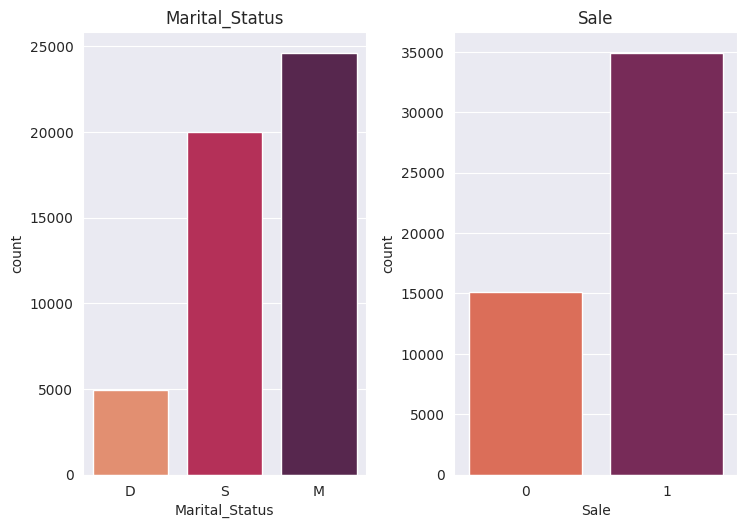

In [ ]:
# Plots for all categorical variables including the first column
fig, axes = plt.subplots(figsize=(15, 30))
fig.subplots_adjust(hspace=3.0)  # Adjust the spacing between subplots
for i in range(len(cate_cols)):
    sns.set_style("darkgrid")
    plt.subplot(6, 4, i+1)
    order = df[cate_cols[i]].value_counts(ascending=True).index
    sns.countplot(x=df[cate_cols[i]], data=df, order=order, palette='rocket_r')
    plt.tight_layout()
    plt.title(cate_cols[i])
plt.show()



Observations

The charts above show the distribution of each categorical feature.

*   The Sale count plot reveals that the dataset is slightly imbalanced, with a higher number of customers not purchasing insurance (0) compared to those who do (1).
* The Marital_Status count plot shows that the dataset comprises mostly Married persons with Divorced persons being the least.



##### Investigating Relationship between Target Variable and Features

<ipython-input-18-5267a24b19c6>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="BuPu", annot=True)


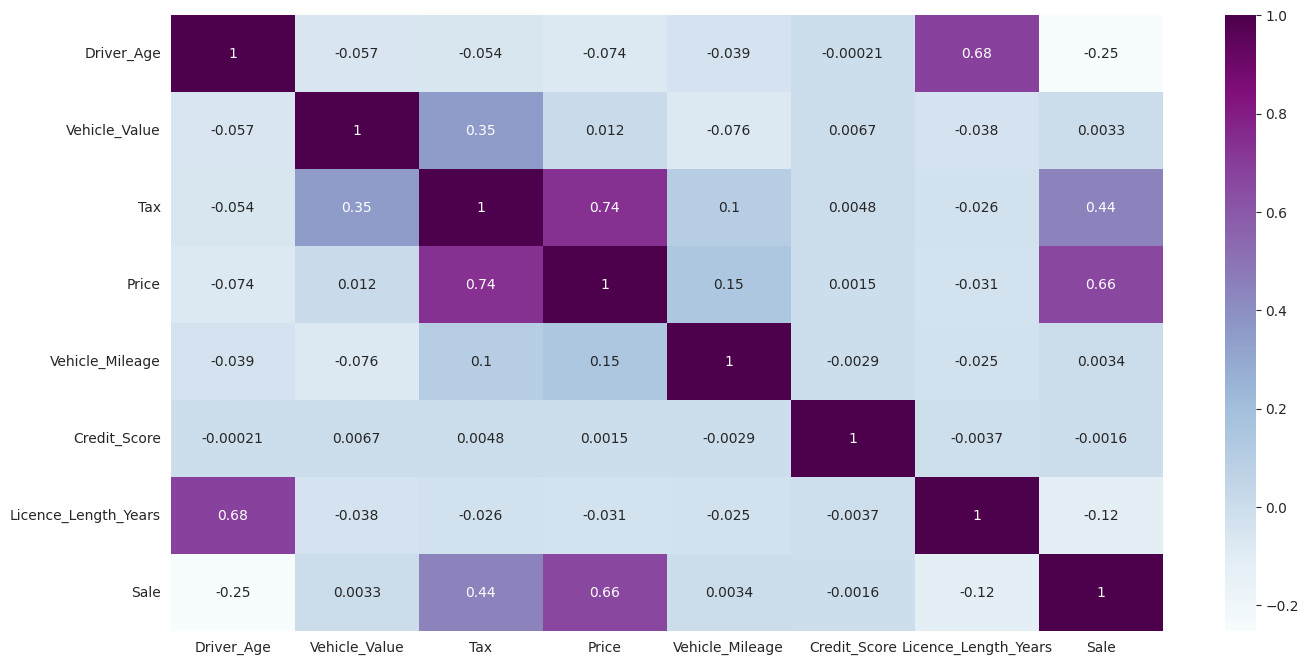

In [ ]:
#plot correlation matrix for numeric column

#convert sale to categorical
df['Sale'] = df['Sale'].astype('int')

f, ax = plt.subplots(figsize=(16, 8))
dataplot = sns.heatmap(df.corr(), cmap="BuPu", annot=True)
plt.show()

Observations

*   The correlation heatmap suggests that there are no strong linear correlations between the numeric variables and the 'Sale' variable. However, there is a moderate positive correlation between 'Price' and 'Sale', indicating that higher prices might contribute to a higher likelihood of purchase.

In [ ]:
#convert sale to categorical
df['Sale'] = df['Sale'].astype('object')

###### Relationship Between Target Variable and Numeric  Variables

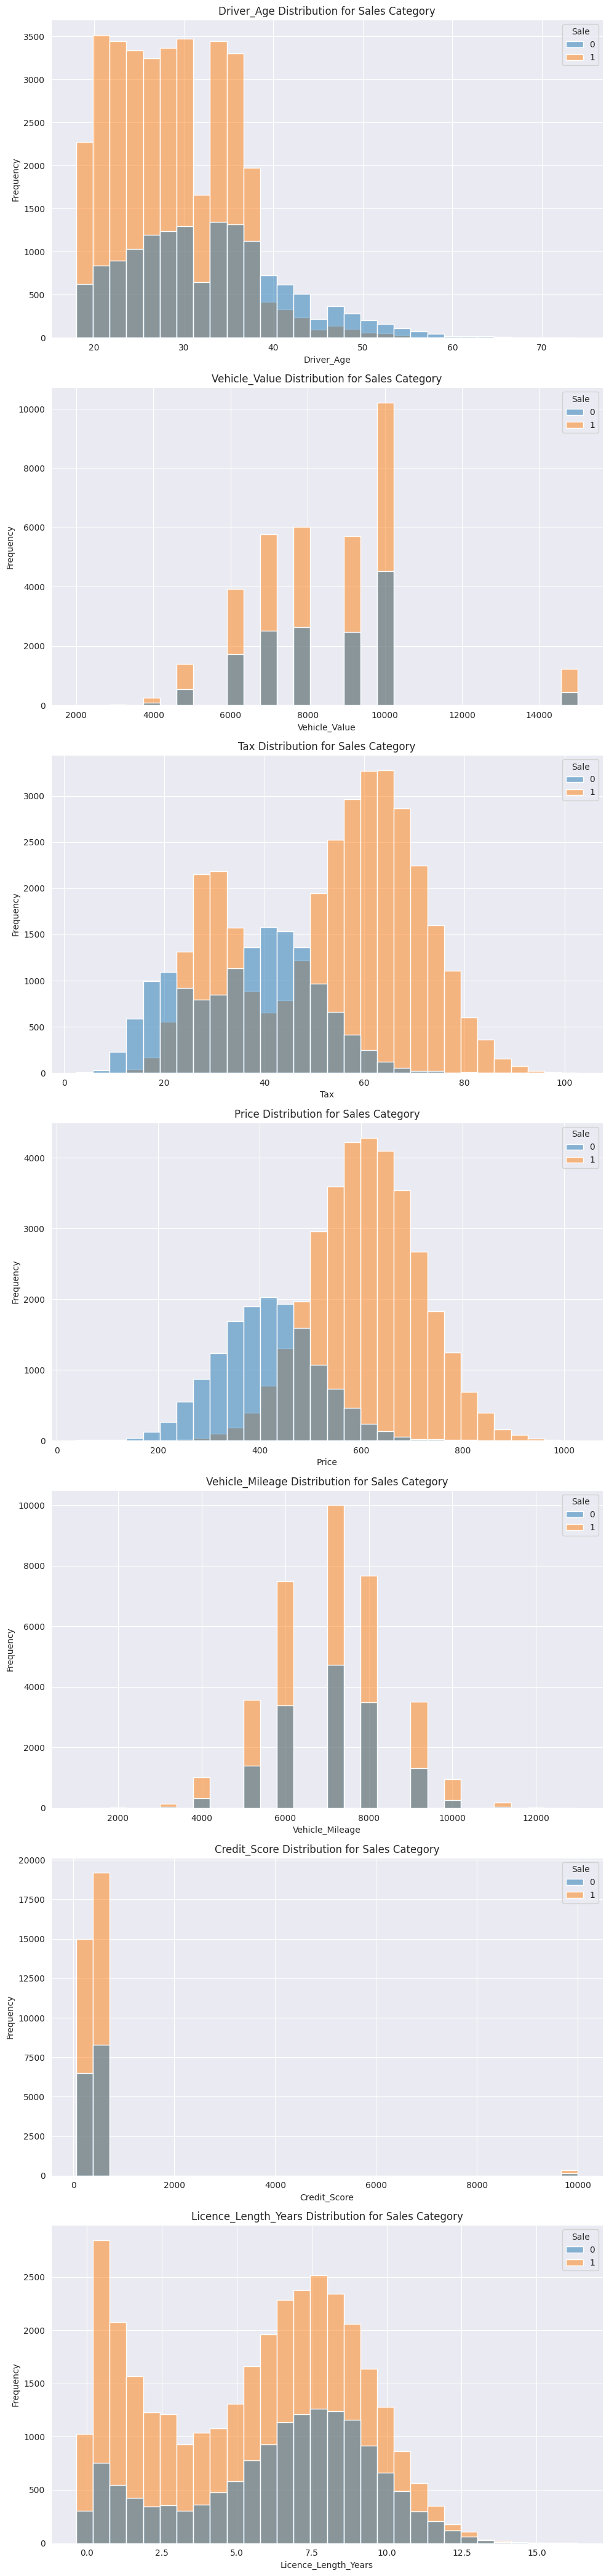

In [ ]:

# Plotting the distribution of each numeric column for each sales category
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 6*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(data=df, x=col, hue='Sale', ax=ax, bins=30, alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{col} Distribution for Sales Category')

plt.tight_layout()
plt.show()

*Observations*
*   The distribution of 'Driver_Age' shows that customers in the age range of 21 to approximately 38 are more likely to purchase insurance (sales category 1). As the age increases beyond 38, the frequency of sales decreases. However, it's important to note that the majority of customers fall within this age range.
*   The histogram for 'Price' reveals that higher-priced insurance policies have a higher frequency of sales (category 1). As the price increases, the frequency of sales increases. This suggests that customers are more inclined to purchase insurance when the price is relatively higher which is suprising.

###### Relationship Between Target Variable and Categorical Variable (Marital Status, Year, Age Group)

Marital Status

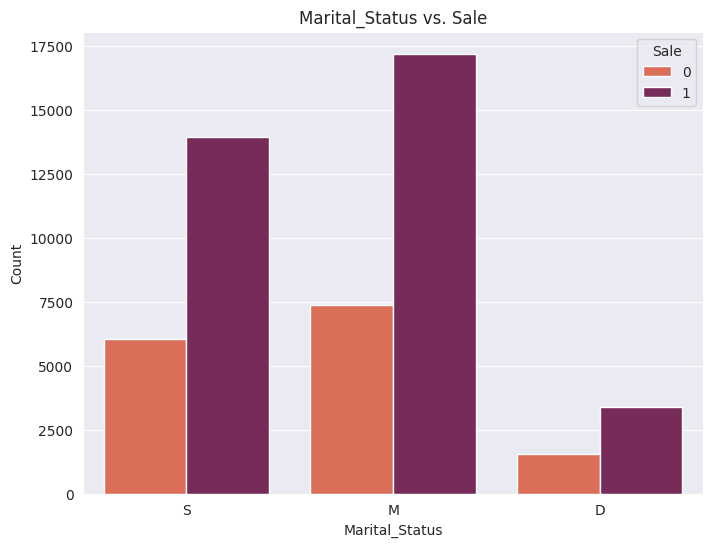

In [ ]:
# Plot countplot for Marital_Status against Sale
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', hue='Sale', data=df, palette='rocket_r')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Marital_Status vs. Sale')
plt.legend(title='Sale')
plt.show()



Observation

*  Count Plot: The count plot of 'Marital_Status' against 'Sale' shows that married individuals have a higher number of insurance purchases compared to other marital status categories.

Date

In [ ]:
# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

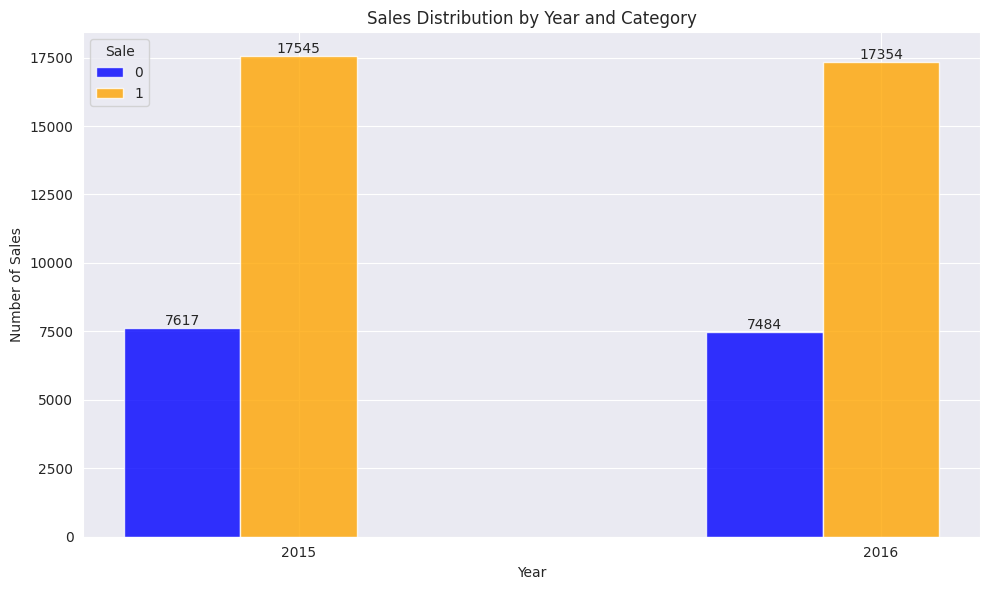

In [ ]:
# Group the data by year and 'Sale' category and calculate the count
sales_by_year_category = df.groupby(['Year', 'Sale']).size().unstack()

# Plot the clustered column chart of sales by year and category
plt.figure(figsize=(10, 6))
num_categories = len(sales_by_year_category.columns)
bar_width = 0.2
opacity = 0.8
index = np.arange(len(sales_by_year_category))

colors = ['blue', 'orange', 'green', 'red', 'purple']  # Customize colors as needed

for i, category in enumerate(sales_by_year_category.columns):
    plt.bar(index + (i * bar_width), sales_by_year_category[category], bar_width, alpha=opacity, label=category, color=colors[i])

    # Add data labels
    for j, value in enumerate(sales_by_year_category[category]):
        plt.annotate(str(value), xy=(index[j] + (i * bar_width), value), ha='center', va='bottom')


plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.title('Sales Distribution by Year and Category')
plt.xticks(index + (num_categories * bar_width) / 2, sales_by_year_category.index)
plt.legend(title='Sale')
plt.tight_layout()
plt.show()

Age Group

In [ ]:
#create age group column
# Group ages into bins
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Driver_Age'], bins=bins, labels=labels, right=False)

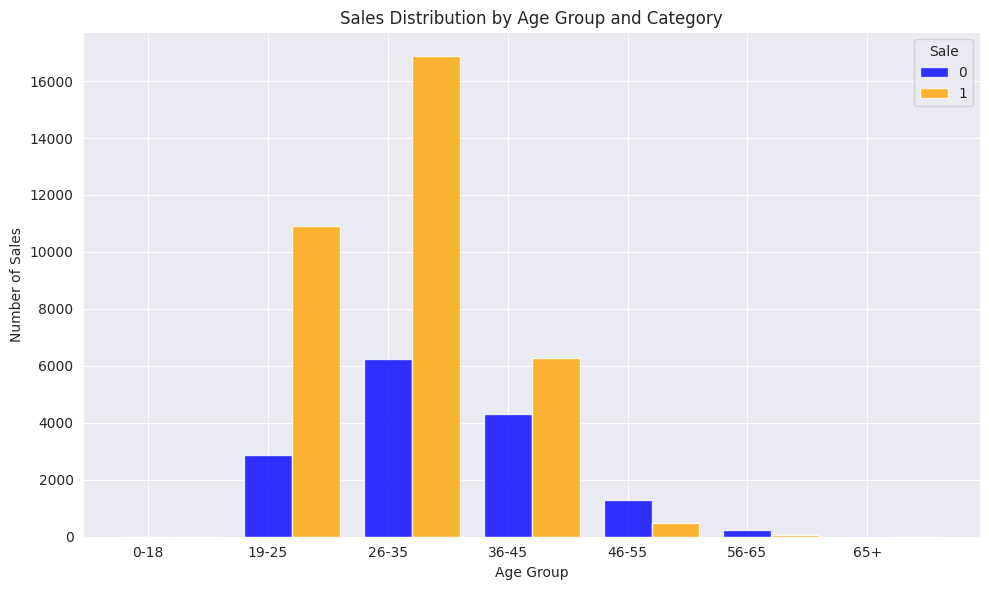

In [ ]:


# Calculate count of sales by age group and sales category
sales_by_age_group_category = df.groupby(['Age_Group', 'Sale']).size().unstack()

# Plot clustered column chart of sales by age group and sales category
plt.figure(figsize=(10, 6))
num_categories = len(sales_by_age_group_category.columns)
bar_width = 0.4
opacity = 0.8
index = range(len(sales_by_age_group_category))

colors = ['blue', 'orange']  # Customize colors as needed

for i, category in enumerate(sales_by_age_group_category.columns):
    plt.bar(index, sales_by_age_group_category[category], bar_width, alpha=opacity, label=category, color=colors[i])
    index = [x + bar_width for x in index]

plt.xlabel('Age Group')
plt.ylabel('Number of Sales')
plt.title('Sales Distribution by Age Group and Category')
plt.xticks(range(len(sales_by_age_group_category)), sales_by_age_group_category.index)
plt.legend(title='Sale')
plt.tight_layout()
plt.show()


#### Data Cleaning

##### **Addressing** Outliers

Driver age and Credit score appear to have outliers due to their skewness. Driver's age is slight while credit_score seems to be a lot.

Driver Age

<Axes: >

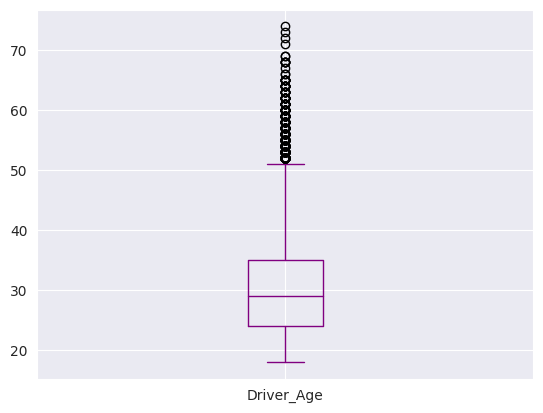

In [ ]:
#create a box plot for Driver_Age
df.boxplot(column=['Driver_Age'], color='purple')

In [ ]:
#get max age
max_age = df['Driver_Age'].max()
print("Maximum Driver Age is %s" % max_age)

Maximum Driver Age is 74.0


Observations

Upon examining the box plot of the 'Driver_Age' column, it is evident that the dataset contains a range of ages for the drivers. The plot indicates the presence of reasonable and valid outliers, representing potentially older drivers. The maximum age of 74 is within the realm of possibility, aligning with the understanding that some individuals continue driving at older ages.

The majority of the ages fall within the range of 25 to 35, which encompasses the age group commonly associated with active driving. This observation indicates that the dataset captures a diverse age distribution, with a significant concentration of drivers falling within the working-age range.

The reasonable presence of potentially older drivers suggests that the dataset encompasses a broad representation of age groups.

Credit Score

<Axes: >

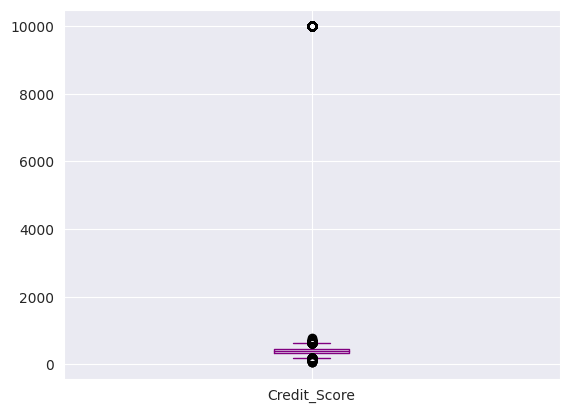

In [ ]:
#create a box plot for Credit_Score
df.boxplot(column=['Credit_Score'], color='purple')

In [ ]:
#get outlier value2
outlier_val = df['Credit_Score'].max()
print("Outlier value is %s" % outlier_val)

Outlier value is 9999.0


Replacing the outlier value with the upper quartile value

In [ ]:
#Obtaining IQR for Credit score
IQR_Credit_Score = df['Credit_Score'].quantile(0.75) - df['Credit_Score'].quantile(0.25)
print("Interquartile range for Credit_Score is %s" % IQR_Credit_Score)

Interquartile range for Credit_Score is 108.889147375


In [ ]:
#obtaining upperlimit
Upper_Credit_Score = df['Credit_Score'].quantile(0.75) + 1.5*IQR_Credit_Score
print("Upperlimit  range for Credit_Score is %s" % Upper_Credit_Score)

Upperlimit  range for Credit_Score is 618.4618364375


In [ ]:
#for credit_score replace the outlier value with the upperlimit.
df['Credit_Score'] = np.where(df['Credit_Score'] >= outlier_val, Upper_Credit_Score, df['Credit_Score'])

<Axes: >

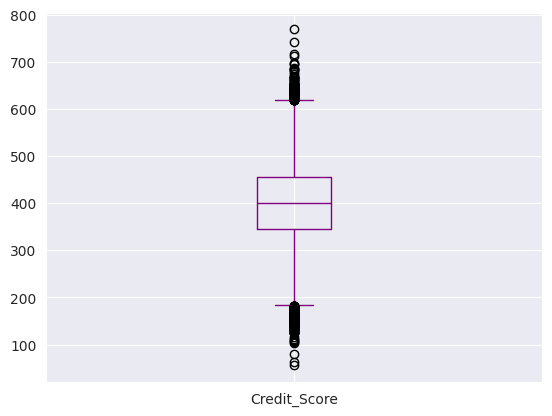

In [ ]:
#create a box plot for Credit_Score
df.boxplot(column=['Credit_Score'], color='purple')

The rest seem like possible credit scores.

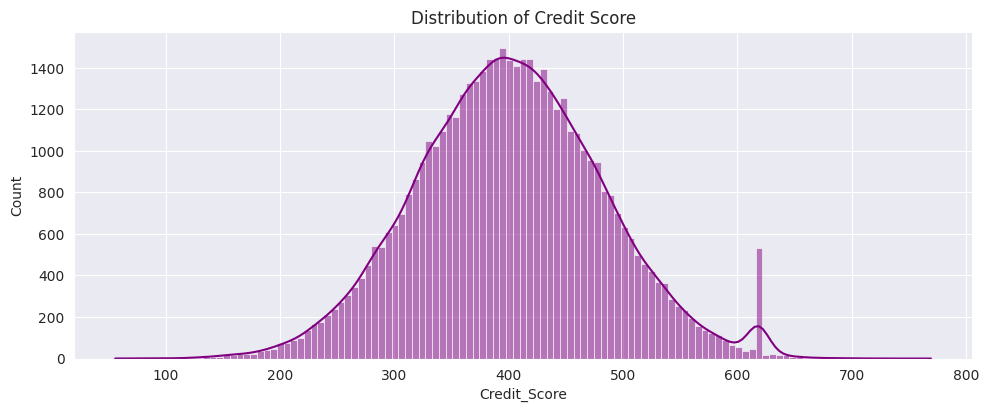

In [ ]:
# plt.style.use('ggplot')
#plots for all numerical variables
fig, axes = plt.subplots(figsize=(10,4))
#7 columns present
sns.set_style("darkgrid")
#     to suggest how the charts be displayed
#     to plot the histogram
sns.histplot(df['Credit_Score'], kde=True, color='purple')
#     to make the layout well organized
plt.tight_layout()
#     to title each plot.
plt.title('Distribution of Credit Score')
plt.show()

 ##### **Identifying and Handling Missing Values**

In [ ]:
#check for missing values
df.isnull().sum()

Driver_Age              494
Vehicle_Value           509
Tax                     481
Price                   496
Vehicle_Mileage         536
Credit_Score            522
Licence_Length_Years    492
Date                      0
Marital_Status          488
Sale                      0
Year                      0
Age_Group               494
dtype: int64

<Axes: >

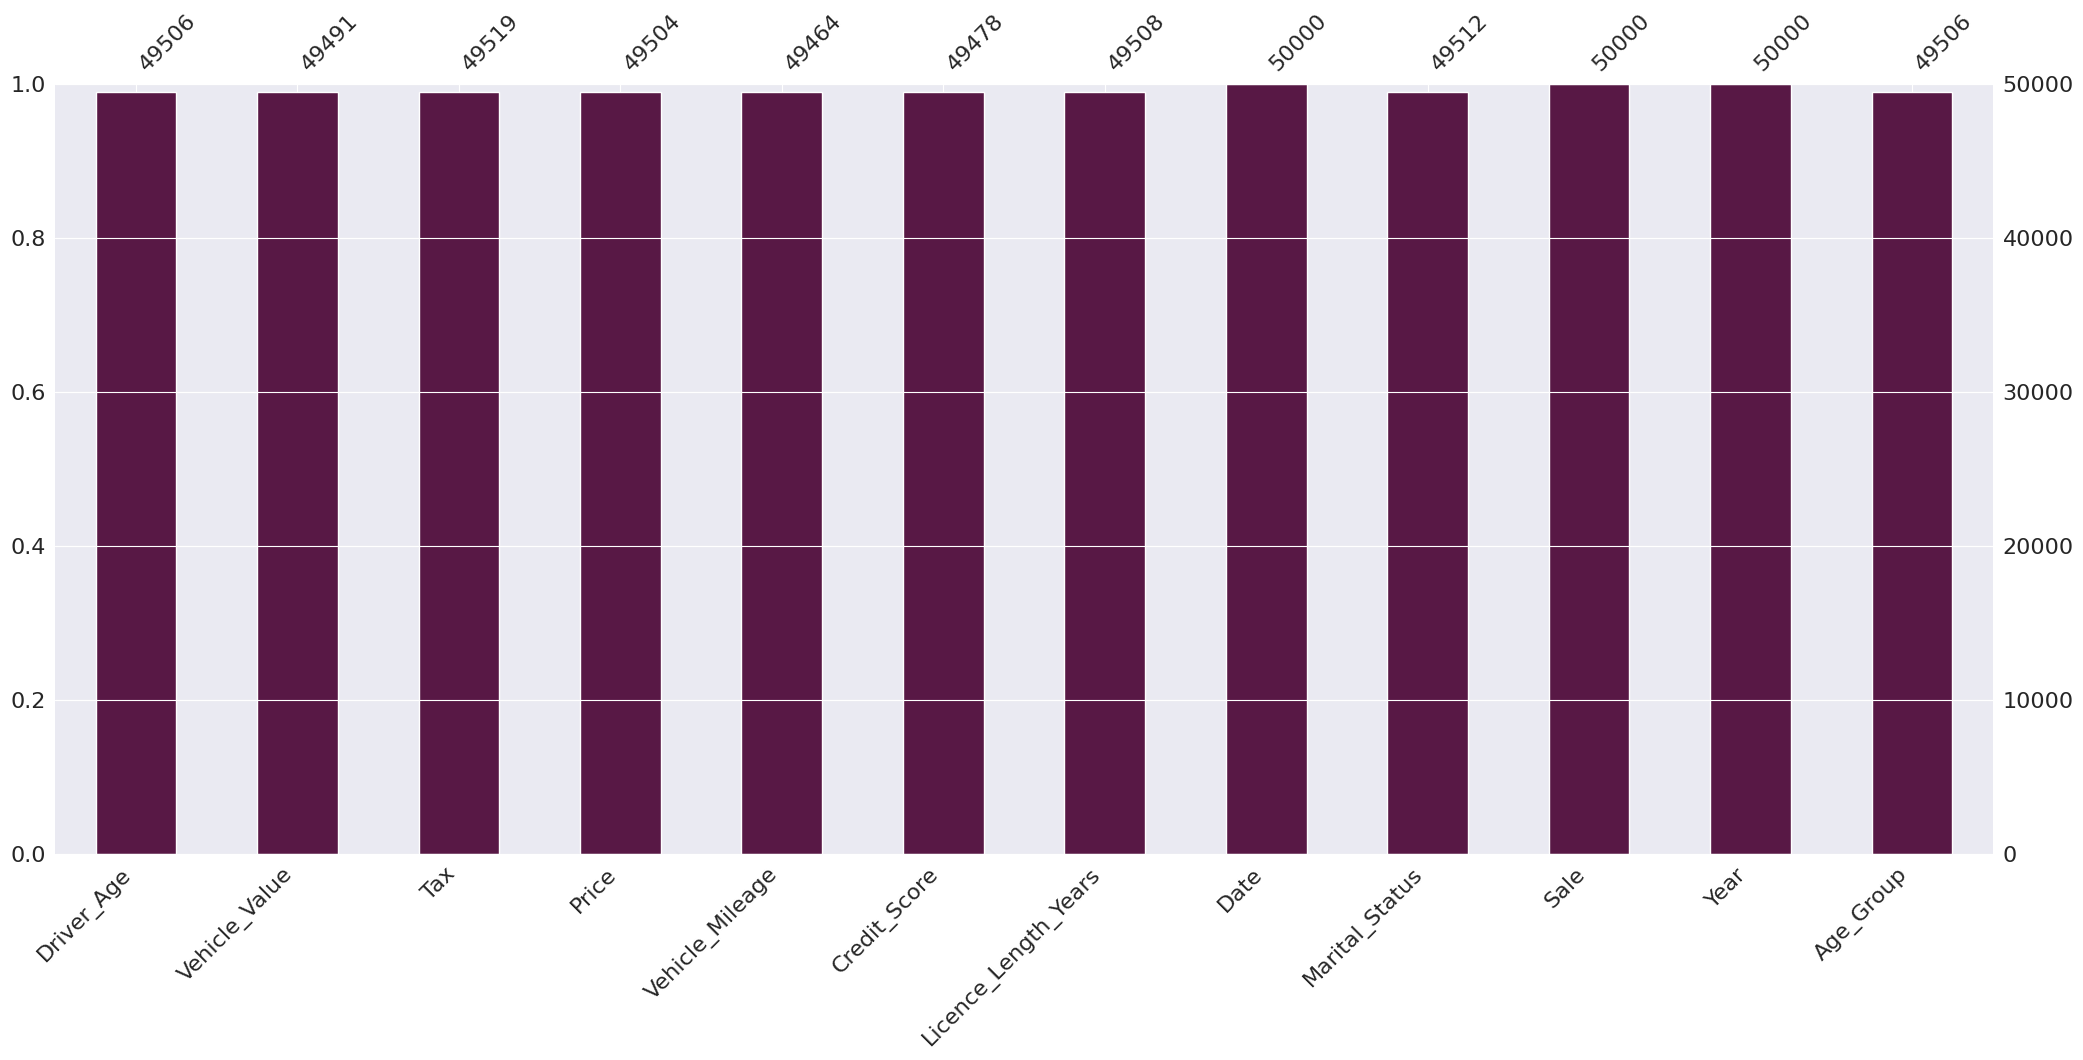

In [ ]:
#Visualize the missing values
msno.bar(df, color="#581845")

Martial Status

In [ ]:
#compute the mode of the marital status
#replacing the marital status with the highest freguency
mode_status = df['Marital_Status'].mode().values[0]
mode_status

'M'

In [ ]:
#replace empty values with mode
df['Marital_Status'] = df['Marital_Status'].fillna(mode_status)

In [ ]:
df['Marital_Status'].isnull().sum()

0

Driver Age

In [ ]:
#use mean to compute the driver age.
mode_driver_age = df['Driver_Age'].median()
mode_driver_age

29.0

In [ ]:
#replace empty values with median age
df['Driver_Age'].replace(np.nan, mode_driver_age, inplace=True)

In [ ]:
df['Driver_Age'].isnull().sum()

0

License length

License length will depend on driver age

Using median because the distribution is not exactly symmetrical for license year.

In [ ]:
# Group the dataset by driver age and calculate median license length
median_license_length = df.groupby('Driver_Age')['Licence_Length_Years'].median()

In [ ]:
# Function to impute missing license length based on driver age
def impute_license_length(row):
    if np.isnan(row['Licence_Length_Years']):
        return median_license_length[row['Driver_Age']]
    else:
        return row['Licence_Length_Years']


In [ ]:
# Apply the imputation function to replace missing values
df['Licence_Length_Years'] = df.apply(impute_license_length, axis=1)


In [ ]:
df['Licence_Length_Years'].isnull().sum()

0

In [ ]:
#age group is decided by age
#drop Age_Group column
df = df.drop(columns=['Age_Group'])

In [ ]:
df['Age_Group'] = pd.cut(df['Driver_Age'], bins=bins, labels=labels, right=False)

In [ ]:
df.isnull().sum()

Driver_Age                0
Vehicle_Value           509
Tax                     481
Price                   496
Vehicle_Mileage         536
Credit_Score            522
Licence_Length_Years      0
Date                      0
Marital_Status            0
Sale                      0
Year                      0
Age_Group                 0
dtype: int64

Credit Score

In [ ]:
#replace credit score with the mean credit score
#use mean to compute the driver age.
mean_cred_score = df['Credit_Score'].mean()
mean_cred_score

401.50430189676746

In [ ]:
#replace credit_score with average credit score
df['Credit_Score'].replace(np.nan, mean_cred_score, inplace=True)

Vehicle Mileage

In [ ]:

#use mean to compute the driver age.
mean_mileage = df['Vehicle_Mileage'].mean()
mean_mileage

6997.007924955523

In [ ]:
#replace mileage with mean mileage
df['Vehicle_Mileage'].replace(np.nan, mean_mileage, inplace=True)

In [ ]:
df['Vehicle_Mileage'].isnull().sum()

0

Vehicle_Value

In [ ]:
#use mean to compute the driver age.
mean_vehicle_value= df['Vehicle_Value'].mean()
mean_vehicle_value

8455.699015982704

In [ ]:
#replace mileage with mean mileage
df['Vehicle_Value'].replace(np.nan, mean_vehicle_value, inplace=True)

In [ ]:
df['Vehicle_Value'].isnull().sum()

0

Tax

This will be dependent on vehicle value.

In [ ]:
mean_tax = df['Tax'].mean()
mean_tax

48.50181188646867

In [ ]:
# Fill missing "Tax" values with the mean
df['Tax'].fillna(mean_tax, inplace=True)

In [ ]:
df['Vehicle_Value'].isnull().sum()

0

Price

In [ ]:
# Group the dataset by Sale and calculate Price
mean_sale = df.groupby('Sale')['Price'].mean()

In [ ]:
mean_sale

Sale
0    414.116104
1    611.960305
Name: Price, dtype: float64

In [ ]:
#cars with the same Car make and Year may have similar prices
df['Price']=df.groupby('Sale')['Price'].apply(lambda x:x.fillna(x.mean()))
df['Price'].isnull().sum()

<ipython-input-63-a5adc9cbacbe>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['Price']=df.groupby('Sale')['Price'].apply(lambda x:x.fillna(x.mean()))


0

In [ ]:
df.isnull().sum()

Driver_Age              0
Vehicle_Value           0
Tax                     0
Price                   0
Vehicle_Mileage         0
Credit_Score            0
Licence_Length_Years    0
Date                    0
Marital_Status          0
Sale                    0
Year                    0
Age_Group               0
dtype: int64

#### Feature Transformation

*   Created Year
*   Created Age Group
*   Combined Driver Experience


In [ ]:
#TODOS
#convert age to int
df['Driver_Age'] = df['Driver_Age'].astype('int')


Create Combined Experience

Combined experience: Multiply the Driver_Age and Licence_Length_Years columns to create a new feature that represents the combined experience of the driver. This feature can help capture the influence of both age and driving experience on sales. It assumes that individuals with more experience may have different purchasing preferences or behaviors compared to those with less experience.

In [ ]:
#create a new column called combined driver experience
df['Combined_Driver_Experience'] = df['Driver_Age'] * df['Licence_Length_Years']

#### Encoding Categorical Data

One Hot Encoding for Marital Status

In [ ]:
#use one-hot encoding for categoty variable marital_status
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['Marital_Status'], prefix='Marital')

In [ ]:

# Concatenate the one-hot encoded columns to the original dataframe
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original "Marital_Status" column
df = df.drop('Marital_Status', axis=1)



In [ ]:
df.head()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Sale,Year,Age_Group,Combined_Driver_Experience,Marital_D,Marital_M,Marital_S
0,56,8000.0,28.163417,563.268338,9000.0,358.945535,4.635140,2015-01-01,0,2015,56-65,259.567849,0,0,1
1,41,5000.0,12.652659,253.053188,8000.0,552.668993,7.137831,2015-01-01,0,2015,36-45,292.651072,0,1,0
2,33,7000.0,17.939741,358.794829,8000.0,438.785405,9.027053,2015-01-01,0,2015,26-35,297.892733,0,1,0
3,37,6000.0,12.907017,258.140333,7000.0,329.121934,8.873923,2015-01-01,0,2015,36-45,328.335166,0,1,0
4,21,8000.0,19.335872,386.717436,6000.0,519.575170,0.927578,2015-01-01,0,2015,19-25,19.479134,0,1,0


Label Encoding for Age Group

In [ ]:
# Initialize the label encoder
encoder = LabelEncoder()

# Fit the encoder on the Age_Group column
encoder.fit(df['Age_Group'])

# Transform the Age_Group column with label encoding
df['Age_Group'] = encoder.transform(df['Age_Group'])

# Print the mapping of encoded values to original categories
mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))
print("Encoded values to original categories mapping:")
for key, value in mapping.items():
    print(key, ":", value)

Encoded values to original categories mapping:
0 : 19-25
1 : 26-35
2 : 36-45
3 : 46-55
4 : 56-65
5 : 65+


#### Feature Selection

In [ ]:
df.columns

Index(['Driver_Age', 'Vehicle_Value', 'Tax', 'Price', 'Vehicle_Mileage',
       'Credit_Score', 'Licence_Length_Years', 'Date', 'Sale', 'Year',
       'Age_Group', 'Combined_Driver_Experience', 'Marital_D', 'Marital_M',
       'Marital_S'],
      dtype='object')

In [ ]:
#convert sale to categorical
df['Sale'] = df['Sale'].astype('int')

<ipython-input-73-b1303907f3ea>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="BuPu", annot=True)


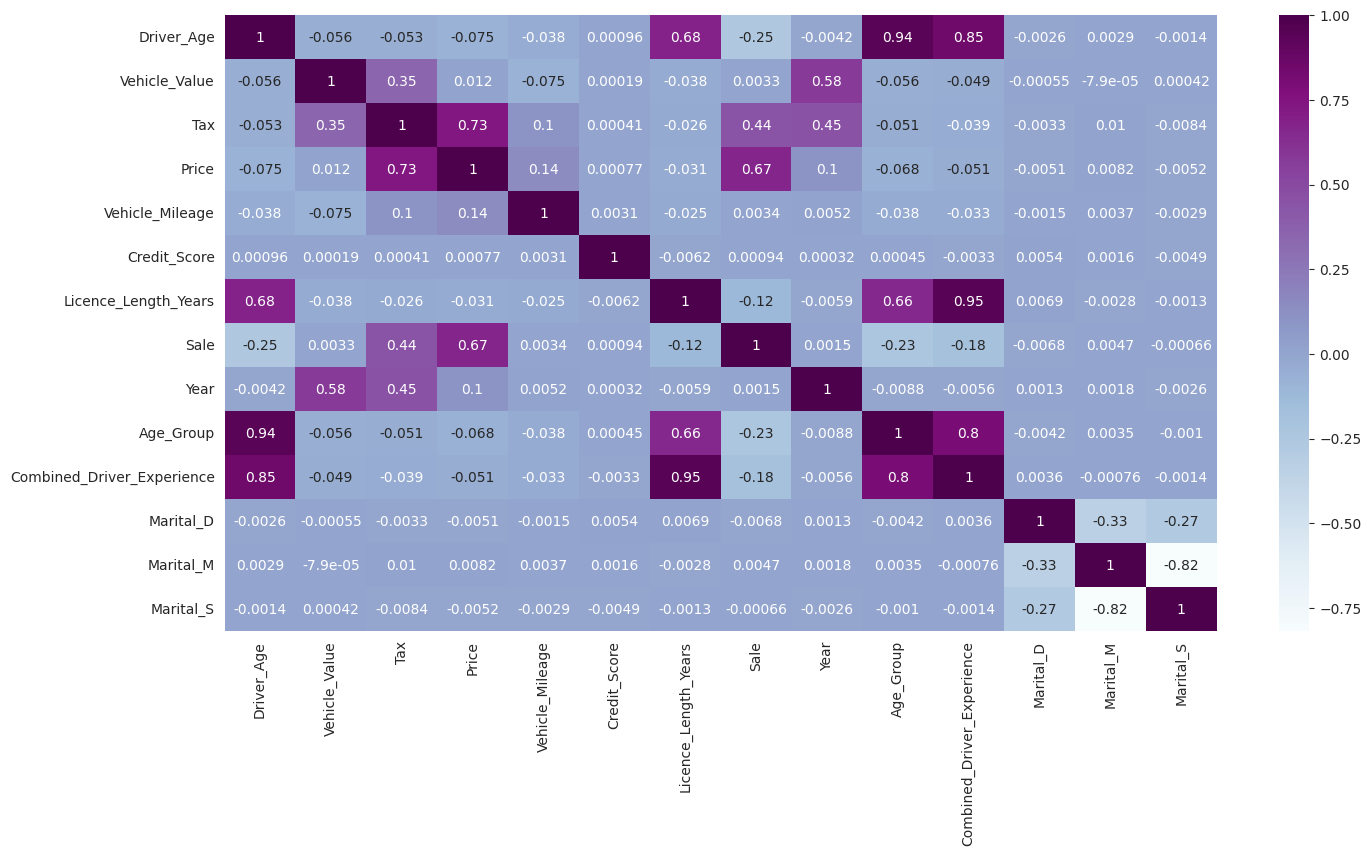

In [ ]:
#plot correlation matrix for numeric columns
f, ax = plt.subplots(figsize=(16, 8))
dataplot = sns.heatmap(df.corr(), cmap="BuPu", annot=True)
plt.show()

In [ ]:
#convert sale to categorical
df['Sale'] = df['Sale'].astype('category')


In [ ]:
df['Sale'].value_counts()

1    34899
0    15101
Name: Sale, dtype: int64

In [ ]:
# numeric variables
#depends on cleaning, after cleaning create the correlation and do plots
from scipy import stats

# Calculate point biserial correlation for each numeric feature
correlations = {}
for feature in numeric_cols:
    correlation, p_value = stats.pointbiserialr(df[feature], df['Sale'])
    correlations[feature] = correlation, p_value

# Print correlations
for feature, (correlation, p_value) in correlations.items():
    print(f"Correlation between {feature} and Sale: {correlation:.4f}, p-value: {p_value:.4f}")


Correlation between Driver_Age and Sale: -0.2511, p-value: 0.0000
Correlation between Vehicle_Value and Sale: 0.0033, p-value: 0.4636
Correlation between Tax and Sale: 0.4429, p-value: 0.0000
Correlation between Price and Sale: 0.6666, p-value: 0.0000
Correlation between Vehicle_Mileage and Sale: 0.0034, p-value: 0.4521
Correlation between Credit_Score and Sale: 0.0009, p-value: 0.8342
Correlation between Licence_Length_Years and Sale: -0.1186, p-value: 0.0000


In [ ]:
cols = ['Vehicle_Value', 'Tax', 'Price', 'Vehicle_Mileage', 'Credit_Score', 'Year', 'Age_Group', 'Combined_Driver_Experience', 'Marital_D',	'Marital_M',	'Marital_S', 'Sale']

In [ ]:
df = df[cols]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Vehicle_Value               50000 non-null  float64 
 1   Tax                         50000 non-null  float64 
 2   Price                       50000 non-null  float64 
 3   Vehicle_Mileage             50000 non-null  float64 
 4   Credit_Score                50000 non-null  float64 
 5   Year                        50000 non-null  int64   
 6   Age_Group                   50000 non-null  int64   
 7   Combined_Driver_Experience  50000 non-null  float64 
 8   Marital_D                   50000 non-null  uint8   
 9   Marital_M                   50000 non-null  uint8   
 10  Marital_S                   50000 non-null  uint8   
 11  Sale                        50000 non-null  category
dtypes: category(1), float64(6), int64(2), uint8(3)
memory usage: 3.2 MB


In [ ]:
#choose Independent Variables
X = df.iloc[:, :-1].values
#view the size
X.shape

(50000, 11)

In [ ]:
#choose target variable
y = df.iloc[:,-1].values
y.shape

(50000,)

#### Train Test Split

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
#view Shape of data after split
print("X_train is ", X_train.shape)
print("X_test is ", X_test.shape)
print("y_train is ", y_train.shape)
print("y_test is ", y_test.shape)

X_train is  (40000, 11)
X_test is  (10000, 11)
y_train is  (40000,)
y_test is  (10000,)


#### Feature Scaling

In [ ]:
#scaling data by standardization
scaler = StandardScaler()
#standardize the train set
X_train = scaler.fit_transform(X_train)
#standardize the test set
X_test = scaler.fit_transform(X_test)

### Modelling

#### Logistic Regression

In [ ]:
#train model
model_logreg = LogisticRegression().fit(X_train, y_train)

In [ ]:
#make prediction
y_pred_logReg = model_logreg.predict(X_test)

Evaluation

In [ ]:
#evaluation classification report
print(classification_report(y_test, y_pred_logReg))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      3056
           1       0.90      0.92      0.91      6944

    accuracy                           0.87     10000
   macro avg       0.85      0.84      0.85     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_logReg)

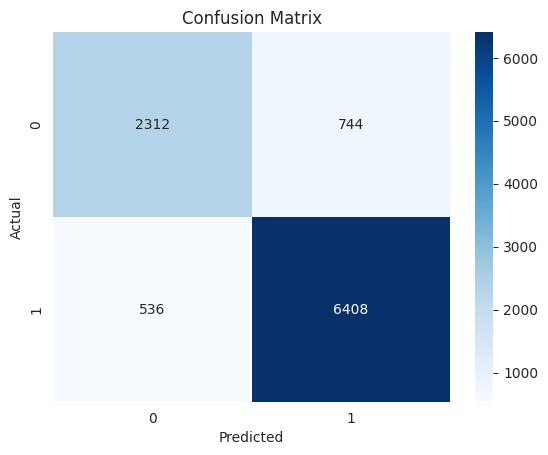

In [ ]:
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


#### Logistic Regression with Cross Validation CV



In [ ]:
#train model
model_logregCV = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

In [ ]:
#make prediction
y_pred_logRegCV = model_logregCV.predict(X_test)

In [ ]:
#evaluation classification report
print(classification_report(y_test, y_pred_logRegCV))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      3056
           1       0.90      0.92      0.91      6944

    accuracy                           0.87     10000
   macro avg       0.85      0.84      0.85     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
#confusion matrix
cms = confusion_matrix(y_test, y_pred_logRegCV)

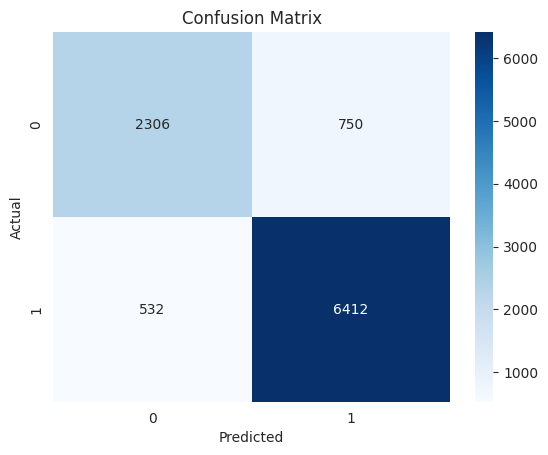

In [ ]:
# Create a heatmap of the confusion matrix
sns.heatmap(cms, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

#### Decision Tree

In [ ]:
#train model
model_decTree = DecisionTreeClassifier().fit(X_train,y_train)

In [ ]:
#make prediction
y_pred_decTree = model_decTree.predict(X_test)

In [ ]:
#evaluation classification report
print(classification_report(y_test, y_pred_decTree))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      3056
           1       0.88      0.87      0.87      6944

    accuracy                           0.82     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.82      0.82      0.82     10000



In [ ]:
#confusion matrix
cms_dec = confusion_matrix(y_test, y_pred_decTree)

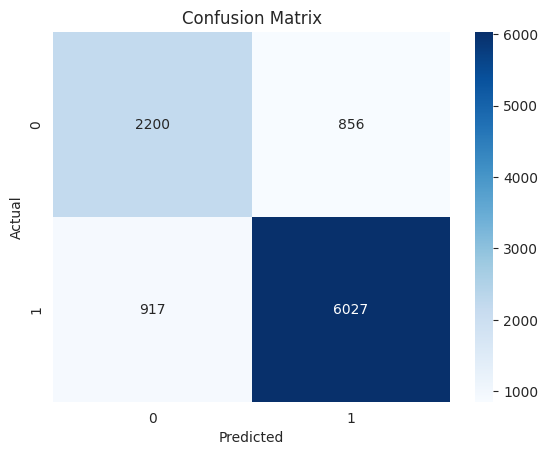

In [ ]:
# Create a heatmap of the confusion matrix
sns.heatmap(cms_dec, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

##### Hyperparameter Tuning for Decision Tree

In [ ]:
#Hyperparameter tuning
# #creating parameter grid containing hyper parameters.
parameters_decTree = {
    'min_samples_split' : [2, 4, 6],
    'min_samples_leaf' : [1, 3, 5],
    'random_state' : [None, 5, 10, 20]

}

#create model
model_decTree = GridSearchCV(DecisionTreeClassifier(), param_grid = parameters_decTree, scoring='accuracy', cv=10)

#fit model
model_decTree.fit(X_train, y_train)

#get hyperparameters
print("Tuned Hyperparameters :", model_decTree.best_params_)
print("Accuracy :",model_decTree.best_score_)

Tuned Hyperparameters : {'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 20}
Accuracy : 0.8458499999999999


In [ ]:
#apply hyperparameters
#train model
model_hypdecTree = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=2, random_state=5).fit(X_train,y_train)

y_pred_hypdecTree = model_hypdecTree.predict(X_test)

#evaluation classification report
print(classification_report(y_test, y_pred_hypdecTree))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      3056
           1       0.89      0.89      0.89      6944

    accuracy                           0.84     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.84      0.84      0.84     10000



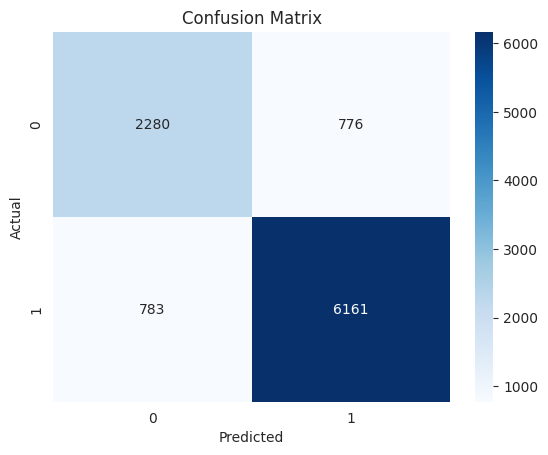

In [ ]:
#confusion matrix
cms_hypdec = confusion_matrix(y_test, y_pred_hypdecTree)

# Create a heatmap of the confusion matrix
sns.heatmap(cms_hypdec, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

#### Random Forest

In [ ]:
#train model
model_forest = RandomForestClassifier().fit(X_train,y_train)

In [ ]:
#make prediction with test set
y_pred_forest = model_forest.predict(X_test)

In [ ]:
#evaluation classification report
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      3056
           1       0.90      0.92      0.91      6944

    accuracy                           0.87     10000
   macro avg       0.85      0.84      0.85     10000
weighted avg       0.87      0.87      0.87     10000



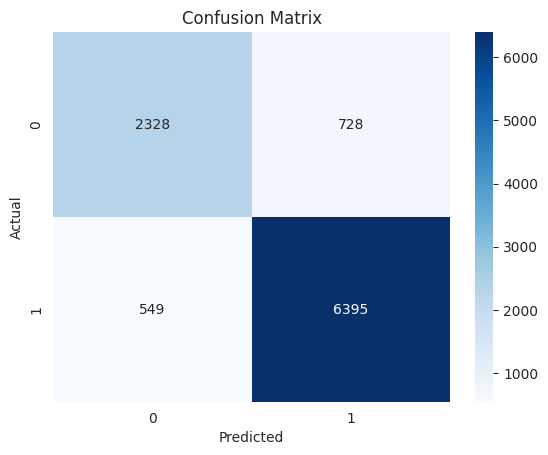

In [ ]:
#confusion matrix
cms_hypforest = confusion_matrix(y_test, y_pred_forest)

# Create a heatmap of the confusion matrix
sns.heatmap(cms_hypforest, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

#### Gradient Boosting

In [ ]:
#train model
model_GB = GradientBoostingClassifier().fit(X_train,y_train)

In [ ]:
#make prediction with test set
y_pred_GB = model_GB.predict(X_test)

In [ ]:
#evaluation classification report
print(classification_report(y_test, y_pred_GB))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      3056
           1       0.90      0.93      0.91      6944

    accuracy                           0.88     10000
   macro avg       0.86      0.84      0.85     10000
weighted avg       0.87      0.88      0.87     10000



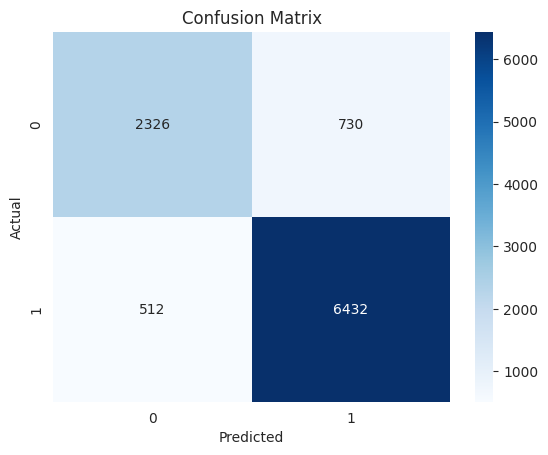

In [ ]:
#confusion matrix
cms_hypGB = confusion_matrix(y_test, y_pred_GB)

# Create a heatmap of the confusion matrix
sns.heatmap(cms_hypGB, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

#### Support Vector Classifier

In [ ]:
#train model
model_svc = SVC().fit(X_train,y_train)

In [ ]:
#make prediction with test set
y_pred_svc = model_svc.predict(X_test)

In [ ]:
#evaluation classification report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      3056
           1       0.89      0.93      0.91      6944

    accuracy                           0.87     10000
   macro avg       0.86      0.83      0.84     10000
weighted avg       0.87      0.87      0.87     10000



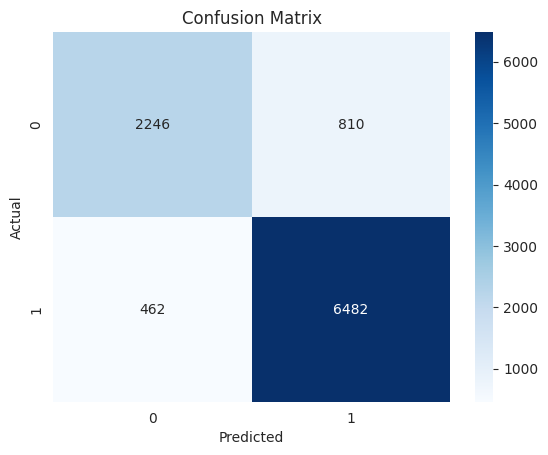

In [ ]:
#confusion matrix
cms_hypSvc = confusion_matrix(y_test, y_pred_svc)

# Create a heatmap of the confusion matrix
sns.heatmap(cms_hypSvc, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

#### Compare Algorithms Based on Evaluation Metrics

In [ ]:
#create a dataframe that contains a list of mse of all algorithms
eval_results = pd.DataFrame({"Algorithm": ["Logistic Regression"
                                                 , "Gradient Boosting Classifier",
                                                "Decision Tree Classifier",
                                                "Random Forest Classifier",
                                                "Support Vector Classifier"],
                                   "Precision": [precision_score(y_test, y_pred_logRegCV),
                                                          precision_score(y_test, y_pred_GB),
                                                          precision_score(y_test, y_pred_hypdecTree),
                                                          precision_score(y_test, y_pred_forest),

                                                          precision_score(y_test, y_pred_svc)],
                                   "Recall": [recall_score(y_test, y_pred_logRegCV),
                                                          recall_score(y_test, y_pred_GB),
                                                          recall_score(y_test, y_pred_hypdecTree),
                                                         recall_score(y_test, y_pred_forest),

                                                          recall_score(y_test, y_pred_svc)],
                                   "F1_Score": [f1_score(y_test, y_pred_logRegCV),
                                                         f1_score(y_test, y_pred_GB,),
                                                          f1_score(y_test, y_pred_hypdecTree),
                                                          f1_score(y_test, y_pred_forest),

                                                          f1_score(y_test, y_pred_svc)],
                                   "Accuracy": [accuracy_score(y_test, y_pred_logRegCV),
                                                          accuracy_score(y_test, y_pred_GB,),
                                                          accuracy_score(y_test, y_pred_hypdecTree),
                                                          accuracy_score(y_test, y_pred_forest),

                                                          accuracy_score(y_test, y_pred_svc)]})
eval_results = eval_results.sort_values(by="Accuracy", ascending=False)
eval_results

,Algorithm,Precision,Recall,F1_Score,Accuracy
1,Gradient Boosting Classifier,0.898073,0.926267,0.911952,0.8758
4,Support Vector Classifier,0.888919,0.933468,0.910649,0.8728
3,Random Forest Classifier,0.897796,0.920939,0.909220,0.8723
0,Logistic Regression,0.895281,0.923387,0.909117,0.8718
2,Decision Tree Classifier,0.888136,0.887241,0.887688,0.8441


Based on the evaluation results obtained for the algorithms in your case study, the "Gradient Boosting Classifier" algorithm stands out as the best performer across multiple metrics such as precision, recall, F1-score, and accuracy.

The high precision score indicates that the algorithm is effective in identifying customers who are likely to make a purchase, minimizing false positives. The high recall score indicates that the algorithm can identify a significant portion of actual positive instances, minimizing false negatives. The high F1-score reflects a balanced performance in terms of precision and recall. Lastly, the high accuracy score indicates the algorithm's overall effectiveness in making accurate predictions.

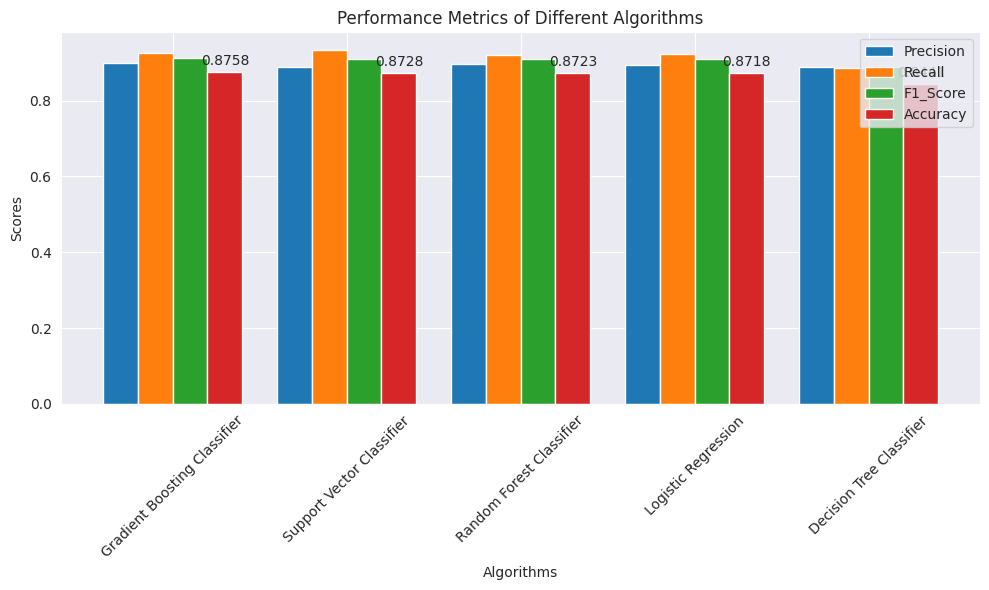

In [ ]:

# Get the algorithm names and corresponding evaluation metrics from eval_results dataframe
algorithms = eval_results['Algorithm']
metrics = ['Precision', 'Recall', 'F1_Score', 'Accuracy']
scores = eval_results[metrics].values.T.tolist()

# Set the positions of the bars on the x-axis
x = np.arange(len(algorithms))

# Set the width of the bars
bar_width = 0.2

# Create the clustered column chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    rects = ax.bar(x + (i - 1.5) * bar_width, scores[i], width=bar_width, label=metric)

# Set labels and title
ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics of Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=45)
ax.legend()

# Display data labels above each bar
def autolabel(rect):
    height = rect.get_height()
    ax.annotate(f'{height:.4f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

for rect in rects:
    autolabel(rect)

plt.tight_layout()
plt.show()


#### Inferencing

In [ ]:
# Prepare input data for prediction (example data)
customer_data = {

    'Vehicle_Value': 5000.0,
    'Tax': 12.652659,
    'Price': 253.053188,
    'Vehicle_Mileage': 8000.0,
    'Credit_Score': 552.668993,

    'Year': 2015,
    'Age_Group': 2,
    'Combined_Driver_Experience': 292.651072,
    'Marital_D': 0,
    'Marital_M': 1,
    'Marital_S': 0
}


In [ ]:
#standardise the data
customer_df =  scaler.fit_transform([[customer_data['Vehicle_Value'], customer_data['Tax'], customer_data['Price'],
                               customer_data['Vehicle_Mileage'], customer_data['Credit_Score'], customer_data['Year'],
                               customer_data['Age_Group'], customer_data['Combined_Driver_Experience'], customer_data['Marital_D'], customer_data['Marital_M'],
                               customer_data['Marital_S']]])

In [ ]:

# Use the trained model to make the prediction
prediction = model_GB.predict(customer_df)



In [ ]:
# Interpret the prediction
if prediction[0] == 1:
    print("The model predicts that there will be a sale.")
else:
    print("The model predicts that there will not be a sale.")

The model predicts that there will be a sale.


### Conclusion

In conclusion, I am pleased to submit my work for the Junior Data Science role at Hastings Direct. Through comprehensive data exploration, preprocessing, and modeling, I have achieved the objectives of this case study. By analyzing key features such as driver age, vehicle value, price, and credit score, I have gained insights into customer behavior and identified correlations with insurance sales. Building predictive models using various algorithms has resulted in high accuracy, precision, recall, and F1-score, indicating their effectiveness in classifying sales. Additionally, feature engineering techniques, including age grouping, combined driver experience, and marital status encoding, have enhanced the models' predictive power and provided valuable insights for customer segmentation and pricing optimization.